# Maximin Criteria From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Euclidean(x1, x2):
    return np.sqrt(np.sum((np.array(x1) - np.array(x2))**2,axis=1))

In [3]:
def maximin(n,m,N=1000,Xorig=None):
    samples = np.random.rand(n, m)
    distances=[]
    index=0
    for k in samples:
        if index <len(samples)-1:           
            distances.append(np.min(Euclidean(samples, k)[index+1:]))           
        index+=1
        
    mindis=np.min(distances)
    
    if Xorig is not None:
        md2 = np.min(Euclidean(samples, Xorig))
        if md2 < mindis:
            mindis = md2
    
    
    for _ in range(N):
        distances=[]
        row_indx = np.random.randint(0, n)
        sample_old=np.array(samples[row_indx,:])
        samples[row_indx,:]=np.random.rand(m)
        index=0

        for k in samples:
            if index <len(samples)-1:
                
                distances.append(np.min(Euclidean(samples, k)[index+1:]))
        
            index+=1

        mindis_new=np.min(distances)
        if Xorig is not None:
            mdprime2 = np.min(Euclidean(samples, Xorig))
            if mdprime2 < mindis_new:
                mindis_new = mdprime2
        

        if mindis_new > mindis:
            mindis = mindis_new  # accept
        else:
            samples[row_indx, :] = sample_old  # reject

    return samples

In [4]:
np.random.seed(42)  # for reproducibility
result = maximin(50, 2, N=10000)
X = np.random.rand(50,2)

Text(0, 0.5, 'Y-axis')

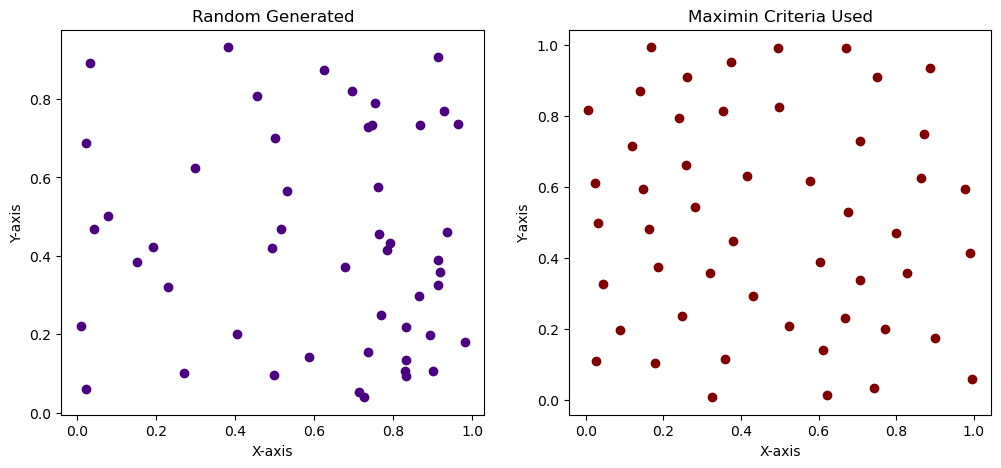

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='indigo')
plt.title('Random Generated')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.subplot(1, 2, 2)
plt.scatter(result[:, 0], result[:, 1], c='maroon', label='Generated Design')
plt.title('Maximin Criteria Used')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')